In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [2]:
df1 = pd.read_csv('../Dataset/order_master.csv')
df1.head(10)

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103.28
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103.28
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103.28
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,20.99
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,177.74
5,O150027389,1,152815384,P150000250,QVC.COM,2015-01-01,02:06:51,32.56
6,O150026271,1,153867980,P150018581,QVC.COM,2015-01-01,01:34:06,85.62
7,O150028997,1,152039090,P150028635,QVC.COM,2015-01-01,03:41:54,202.56
8,O150031641,2,152033639,P150039481,QVC.COM,2015-01-01,07:30:17,24.10
9,O150031488,1,152275813,P150042231,QVC.COM,2015-01-01,07:24:03,31.20


In [3]:
df1 = df1.drop(['ORDER_NBR', 'ORDER_LINE_NBR', 'CUSTOMER_NBR', 'PRODUCT_NBR', 'ORDER_PLATFORM', 'ORDER_TIME'], axis=1)
df1.head(10)

,ORDER_DATE,TOTAL_LINE_AMT
0,2015-01-01,103.28
1,2015-01-01,103.28
2,2015-01-01,103.28
3,2015-01-01,20.99
4,2015-01-01,177.74
5,2015-01-01,32.56
6,2015-01-01,85.62
7,2015-01-01,202.56
8,2015-01-01,24.10
9,2015-01-01,31.20


In [4]:
df1.dtypes

ORDER_DATE         object
TOTAL_LINE_AMT    float64
dtype: object

In [5]:
df1['ORDER_DATE'] = pd.to_datetime(df1['ORDER_DATE'])
df1.head(10)

,ORDER_DATE,TOTAL_LINE_AMT
0,2015-01-01,103.28
1,2015-01-01,103.28
2,2015-01-01,103.28
3,2015-01-01,20.99
4,2015-01-01,177.74
5,2015-01-01,32.56
6,2015-01-01,85.62
7,2015-01-01,202.56
8,2015-01-01,24.10
9,2015-01-01,31.20


In [6]:
df1.dtypes

ORDER_DATE        datetime64[ns]
TOTAL_LINE_AMT           float64
dtype: object

In [7]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df1 = df1['TOTAL_LINE_AMT'].groupby(df1['ORDER_DATE']).agg(['sum']).reset_index()
df1.head(10)

,ORDER_DATE,sum
0,2014-12-17,997
1,2015-01-01,3656258
2,2015-01-02,3473420
3,2015-01-03,4713863
4,2015-01-04,4250090
5,2015-01-05,3228927
6,2015-01-06,2956335
7,2015-01-07,3387351
8,2015-01-08,4471845
9,2015-01-09,3301963


In [8]:
df1 = df1.rename(columns={'ORDER_DATE': 'DATE'})
df1.head(10)

,DATE,sum
0,2014-12-17,997
1,2015-01-01,3656258
2,2015-01-02,3473420
3,2015-01-03,4713863
4,2015-01-04,4250090
5,2015-01-05,3228927
6,2015-01-06,2956335
7,2015-01-07,3387351
8,2015-01-08,4471845
9,2015-01-09,3301963


In [9]:
df1.dtypes

DATE    datetime64[ns]
sum            float64
dtype: object

In [10]:
df2 = pd.read_csv('../Dataset/email_campaign.csv')
df2.head(10)

,CAMPAIGN_DATE,PRODUCT_CATEGORY,CAMPAIGN_SPEND
0,1/1/2015,All,7192
1,1/1/2015,Accessories,1494
2,1/1/2015,Jewelry,381
3,1/2/2015,"Apparel, Accessories & Jewelry",532
4,1/5/2015,Apparel & Accessories,3788
5,1/8/2015,All,8632
6,1/15/2015,All,62
7,1/16/2015,Electronics,5306
8,1/17/2015,Kitchen & Food,2029
9,1/19/2015,Apparel,1270


In [11]:
df2 = df2.drop('PRODUCT_CATEGORY', axis=1)
df2.head(10)

,CAMPAIGN_DATE,CAMPAIGN_SPEND
0,1/1/2015,7192
1,1/1/2015,1494
2,1/1/2015,381
3,1/2/2015,532
4,1/5/2015,3788
5,1/8/2015,8632
6,1/15/2015,62
7,1/16/2015,5306
8,1/17/2015,2029
9,1/19/2015,1270


In [12]:
df2['CAMPAIGN_DATE'] = pd.to_datetime(df2['CAMPAIGN_DATE'])

In [13]:
df2.head(10)

,CAMPAIGN_DATE,CAMPAIGN_SPEND
0,2015-01-01,7192
1,2015-01-01,1494
2,2015-01-01,381
3,2015-01-02,532
4,2015-01-05,3788
5,2015-01-08,8632
6,2015-01-15,62
7,2015-01-16,5306
8,2015-01-17,2029
9,2015-01-19,1270


In [14]:
df2.dtypes

CAMPAIGN_DATE     datetime64[ns]
CAMPAIGN_SPEND           float64
dtype: object

In [15]:
df2 = df2['CAMPAIGN_SPEND'].groupby(df2['CAMPAIGN_DATE']).agg(['sum']).reset_index()
df2.head(10)

,CAMPAIGN_DATE,sum
0,2015-01-01,9066
1,2015-01-02,532
2,2015-01-05,3788
3,2015-01-08,8632
4,2015-01-15,62
5,2015-01-16,5306
6,2015-01-17,2029
7,2015-01-19,1270
8,2015-01-21,5061
9,2015-01-23,1030


In [16]:
df2 = df2.rename(columns={'CAMPAIGN_DATE': 'DATE'})
df2.head(10)

,DATE,sum
0,2015-01-01,9066
1,2015-01-02,532
2,2015-01-05,3788
3,2015-01-08,8632
4,2015-01-15,62
5,2015-01-16,5306
6,2015-01-17,2029
7,2015-01-19,1270
8,2015-01-21,5061
9,2015-01-23,1030


In [17]:
df2.dtypes

DATE    datetime64[ns]
sum            float64
dtype: object

In [18]:
df = pd.merge(df1,df2, on='DATE',how='left')

In [19]:
df.head(10)

,DATE,sum_x,sum_y
0,2014-12-17,997,nan
1,2015-01-01,3656258,9066
2,2015-01-02,3473420,532
3,2015-01-03,4713863,nan
4,2015-01-04,4250090,nan
5,2015-01-05,3228927,3788
6,2015-01-06,2956335,nan
7,2015-01-07,3387351,nan
8,2015-01-08,4471845,8632
9,2015-01-09,3301963,nan


In [20]:
df = df.fillna(0)
df.head(10)

,DATE,sum_x,sum_y
0,2014-12-17,997,0
1,2015-01-01,3656258,9066
2,2015-01-02,3473420,532
3,2015-01-03,4713863,0
4,2015-01-04,4250090,0
5,2015-01-05,3228927,3788
6,2015-01-06,2956335,0
7,2015-01-07,3387351,0
8,2015-01-08,4471845,8632
9,2015-01-09,3301963,0


In [21]:
df = df.set_index(['DATE'])

In [22]:
df.drop(df.index[[0]], inplace=True)

In [23]:
df.head(10)

,sum_x,sum_y
DATE,,
2015-01-01,3656258,9066
2015-01-02,3473420,532
2015-01-03,4713863,0
2015-01-04,4250090,0
2015-01-05,3228927,3788
2015-01-06,2956335,0
2015-01-07,3387351,0
2015-01-08,4471845,8632
2015-01-09,3301963,0


In [24]:
type(df['sum_x'])

pandas.core.series.Series

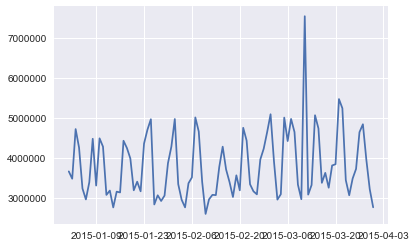

In [25]:
plt.plot(df['sum_x'])

In [26]:
# Check whether series is white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['sum_x'])


# The returns are ljung-box test statistic, it's pvalue,for all lags up to 40.
# Looking at the second series, it is clear that all p-values < 0.05 which means the series is NOT white noise

C:\Users\prati\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(array([   3.96954187,    7.31985647,   11.96812172,   15.21289974,
          16.02587717,   28.33830239,   46.41266112,   49.22702759,
          51.33151909,   53.07979984,   55.83861018,   57.0749977 ,
          61.44202804,   76.65740164,   79.84525919,   80.75002872,
          83.64230254,   89.2962852 ,   93.14894891,   95.72907059,
         111.04602599,  114.22501037,  117.06036628,  125.94892364,
         134.45153182,  136.26444862,  140.61721912,  154.78686228,
         155.30599635,  159.77406019,  165.84377036,  168.40048126,
         169.41656016,  173.19468976,  180.95469743,  181.07263229,
         186.24112074,  190.33473467,  192.77500336,  192.91771155]),
 array([  4.63303758e-02,   2.57343595e-02,   7.49316362e-03,
          4.27941927e-03,   6.77058047e-03,   8.11319076e-05,
          7.26559261e-08,   5.75143059e-08,   6.04592047e-08,
          7.19614638e-08,   5.44008839e-08,   7.66157139e-08,
          2.89704358e-08,   1.17349560e-10,   7.45476332e-11,
        

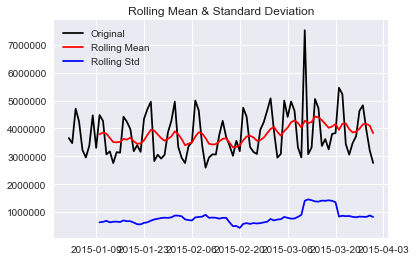

In [27]:
    #Determing rolling statistics
    rolmean = df['sum_x'].rolling(window=10).mean()
    rolstd = df['sum_x'].rolling(window=10).std()
   

    #Plot rolling statistics:
    orig = plt.plot(df['sum_x'], color='black',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='blue', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(df['sum_x'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -1.70752
p-value                        0.42724
#Lags Used                     7.00000
Number of Observations Used   82.00000
dtype: float64


* p-value > 0.05 indicates the series is not stationary

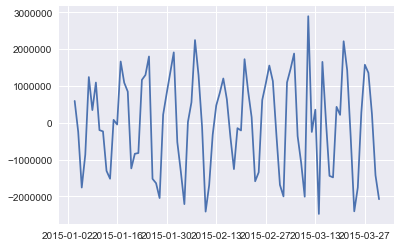

In [29]:
# Differencing to make series stationary
x = df['sum_x'] - df['sum_x'].shift(3)
plt.plot(x)

In [30]:
type(x)

pandas.core.series.Series

In [31]:
x.dropna(inplace=True)
x

DATE
2015-01-04     593832.20000
2015-01-05    -244493.24000
2015-01-06   -1757528.25000
2015-01-07    -862738.95000
2015-01-08    1242917.97000
2015-01-09     345627.66000
2015-01-10    1094424.88000
2015-01-11    -197268.06000
2015-01-12    -232679.25000
2015-01-13   -1304452.26000
2015-01-14   -1518132.99000
2015-01-15      80640.12000
2015-01-16     -46310.45000
2015-01-17    1665484.45000
2015-01-18    1089871.55000
2015-01-19     847948.79000
2015-01-20   -1237494.90000
2015-01-21    -840577.15000
2015-01-22    -820174.22000
2015-01-23    1166271.06000
2015-01-24    1299128.35000
2015-01-25    1801375.34000
2015-01-26   -1520566.05000
2015-01-27   -1639324.49000
2015-01-28   -2042577.06000
2015-01-29     222089.19000
2015-01-30     801983.67000
2015-01-31    1358170.69000
2015-02-01    1913210.61000
2015-02-02    -522420.73000
                  ...      
2015-03-02    -320246.88000
2015-03-03   -1685836.94000
2015-03-04   -1997580.68000
2015-03-05    1096318.12000
2015-03-06    1

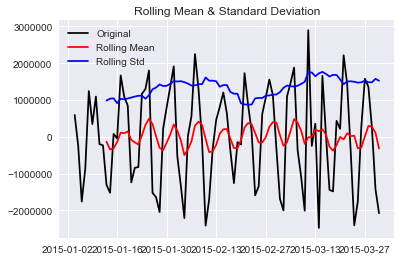

In [32]:
    #Determing rolling statistics
    rolmean = x.rolling(window=10).mean()
    rolstd = x.rolling(window=10).std()
   

    #Plot rolling statistics:
    orig = plt.plot(x, color='black',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='blue', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [33]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(x)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -4.3386139173
p-value                        0.0003805723
#Lags Used                    11.0000000000
Number of Observations Used   75.0000000000
dtype: float64


* p-value < 0.05 indicates series is stationary

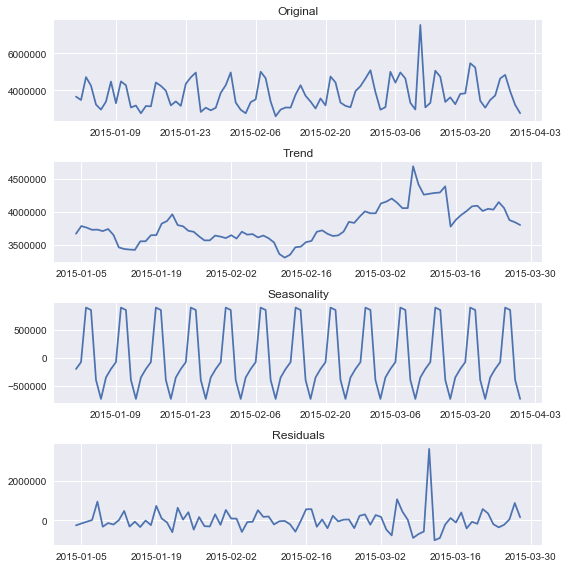

In [34]:
# Alternative way to make Time series stationary
from statsmodels.tsa.seasonal import seasonal_decompose
fq=7
decomposition = seasonal_decompose(df['sum_x'], freq=fq)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(1, figsize=(8,8))
plt.subplot(411)
plt.plot(df['sum_x'], label='Original')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [35]:
residual.dropna(inplace=True)

In [36]:
type(residual)

pandas.core.series.Series

In [37]:
residual.dtypes

dtype('float64')

In [38]:
residual.head(10)

DATE
2015-01-04   -261883.7905610962
2015-01-05   -164511.3093706635
2015-01-06    -77259.7197277783
2015-01-07      8223.8122954188
2015-01-08    939541.5386055795
2015-01-09   -328755.1890136001
2015-01-10   -143748.1750849196
2015-01-11   -218392.7848470228
2015-01-12       208.3663436495
2015-01-13    468019.8302721749
Name: sum_x, dtype: float64

In [39]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(residual)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -5.6087306841
p-value                        0.0000012172
#Lags Used                     8.0000000000
Number of Observations Used   75.0000000000
dtype: float64


* p-value < 0.05 indicates series is stationary

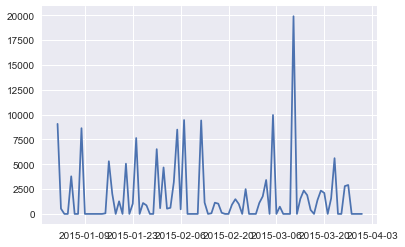

In [40]:
# Looking at the independent variable
plt.plot(df['sum_y'])

In [41]:
df.head(10)

,sum_x,sum_y
DATE,,
2015-01-01,3656258.2199999983,9066.3300000000
2015-01-02,3473419.9599999683,531.8700000000
2015-01-03,4713863.2000000738,0.0000000000
2015-01-04,4250090.4200001946,0.0000000000
2015-01-05,3228926.7200000188,3788.4400000000
2015-01-06,2956334.9499999913,0.0000000000
2015-01-07,3387351.4699994326,0.0000000000
2015-01-08,4471844.6900000889,8632.3100000000
2015-01-09,3301962.6099999892,0.0000000000


In [42]:
df['sum_x'] = x
df.dropna(inplace=True)
df.head(10)

,sum_x,sum_y
DATE,,
2015-01-04,593832.2000001962,0.0000000000
2015-01-05,-244493.2399999495,3788.4400000000
2015-01-06,-1757528.2500000824,0.0000000000
2015-01-07,-862738.9500007620,0.0000000000
2015-01-08,1242917.9700000701,8632.3100000000
2015-01-09,345627.6599999978,0.0000000000
2015-01-10,1094424.8800006872,0.0000000000
2015-01-11,-197268.0600000452,0.0000000000
2015-01-12,-232679.2499998985,0.0000000000


In [43]:
df.to_csv('../Dataset/Q2_Diff_Stationary_Clean_data.csv') # To be used by R forecast package 